In [3]:
from google.colab import files
upload = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(upload["netflix_titles.csv"]))

In [5]:
df.shape

(8807, 12)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [12]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [11]:
# Handling Missing Values.
# Instead of dropping values, we'll fill it with "Unknown".

df[["director", "cast", "country", "date_added", "rating"]] = df[["director", "cast", "country", "date_added", "rating"]].fillna("Unknown")

In [13]:
df["director"].head(10)

,director
0,Kirsten Johnson
1,Unknown
2,Julien Leclercq
3,Unknown
4,Unknown
5,Mike Flanagan
6,"Robert Cullen, José Luis Ucha"
7,Haile Gerima
8,Andy Devonshire
9,Theodore Melfi


In [14]:
df["country"].head(10)

,country
0,United States
1,South Africa
2,Unknown
3,Unknown
4,India
5,Unknown
6,Unknown
7,"United States, Ghana, Burkina Faso, United Kin..."
8,United Kingdom
9,United States


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

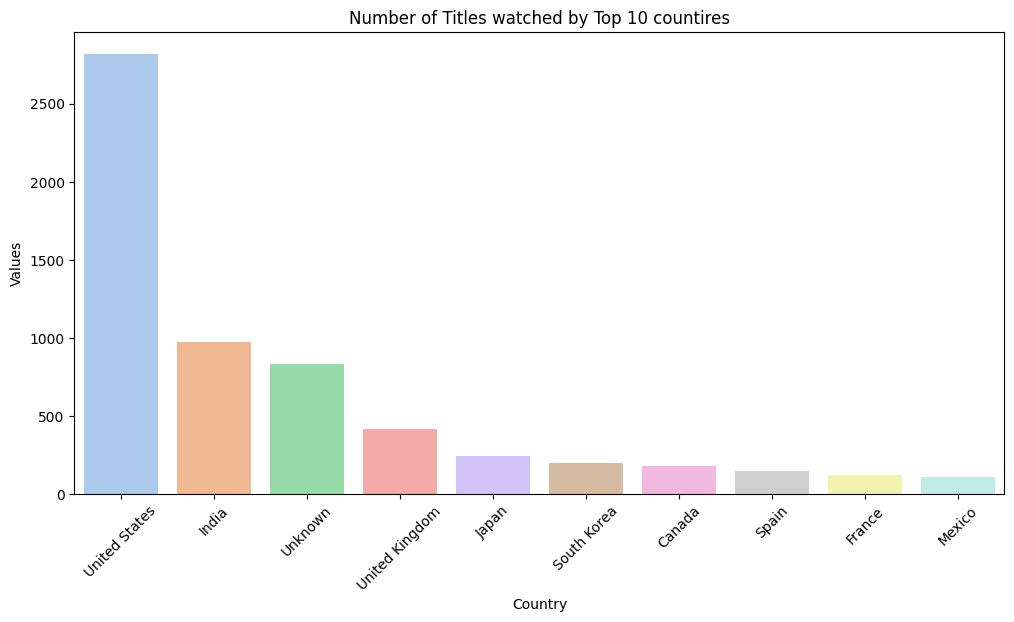

In [16]:
# Number of Titles watched by Top 10 countires
top_countries = df["country"].value_counts().nlargest(10)

# Plotting Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x = top_countries.index, y = top_countries.values, hue=top_countries.index, palette="pastel")
plt.title("Number of Titles watched by Top 10 countires")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Values")
plt.show()

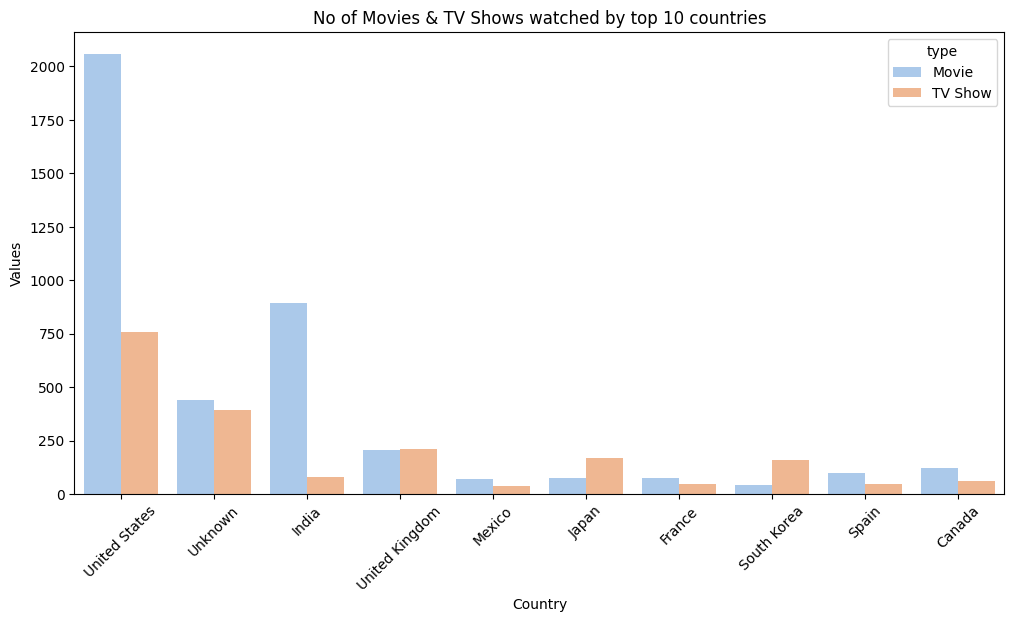

In [18]:
# No of Movies & TV Shows watched by top 10 countries.
top_countries = df["country"].value_counts().nlargest(10)
top_countries_df = df[df["country"].isin(top_countries.index)]

# Plotting Stacked Plot
plt.figure(figsize=(12, 6))
sns.countplot(data = top_countries_df, x = "country", hue = "type", palette = "pastel")
plt.title("No of Movies & TV Shows watched by top 10 countries")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Values")
plt.show()

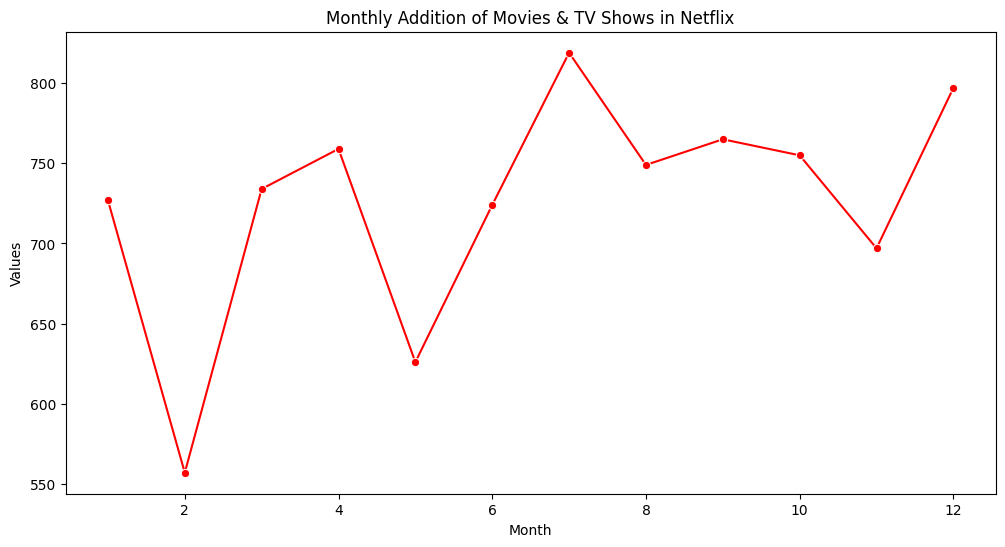

In [22]:
# Monthly movies & tv shows added on Netflix.
df["Month"] = pd.to_datetime(df["date_added"], errors = "coerce").dt.month
monthly_content = df.groupby("Month").size()

# Ploting lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x = monthly_content.index, y = monthly_content.values, marker = "o", color = "red")
plt.title("Monthly Addition of Movies & TV Shows in Netflix")
plt.xlabel("Month")
plt.ylabel("Values")
month_name = [calendar.month_name[i] for i in range(1, 13)]
plt.show()

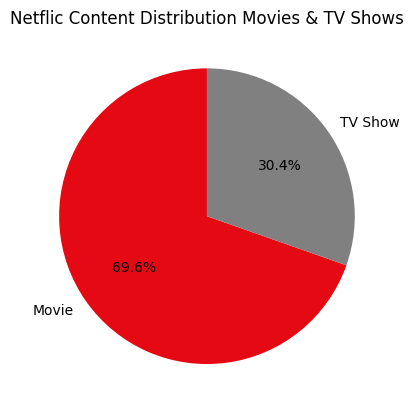

In [29]:
# Pie Colors
netflix_red = "#E50914"   # Netflix official red color
netflix_black = "grey" # Netflix dark theme color

# Content Distribution of Movies & TV Shows on Netflix
df["type"].value_counts().plot.pie(autopct = "%1.1f%%", startangle = 90, colors = [netflix_red, netflix_black])
plt.title("Netflic Content Distribution Movies & TV Shows")
plt.ylabel("")
plt.show()

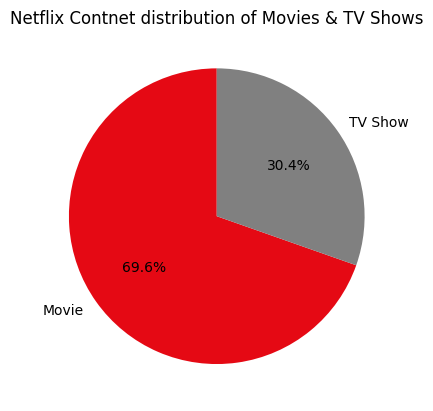

In [35]:
# Pie Colors
netflix_red = "#E50914"   # Netflix official red color
netflix_black = "grey" # Netflix dark theme color

# Plotting Pie Chart
df["type"].value_counts().plot.pie(autopct = "%1.1f%%", startangle = 90, colors = [netflix_red, netflix_black])
plt.title("Netflix Contnet distribution of Movies & TV Shows")
plt.ylabel("")
plt.show()

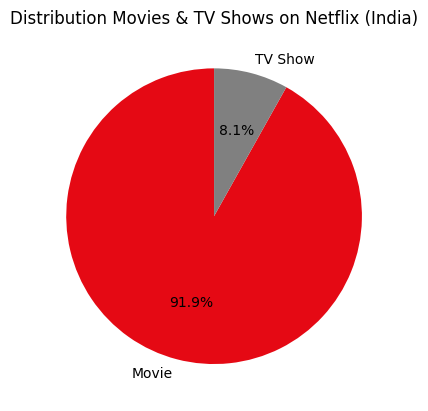

In [41]:
# Pie Colors
netflix_red = "#E50914"   # Netflix official red color
netflix_black = "grey" # Netflix dark theme color

# Distribution Movies & TV Shows on Netflix (India).
India = df[df["country"] == "India"]["type"].value_counts()

# Plotting pie plot
India.plot.pie(autopct = "%1.1f%%", startangle = 90, colors = [netflix_red, netflix_black])
plt.title("Distribution Movies & TV Shows on Netflix (India)")
plt.ylabel("")
plt.show()